In [27]:
import numpy as np

def trapecio_compuesto(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    y = f(x)
    integral = h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])
    return integral

def simpson_compuesto(f, a, b, n):
    # n debe ser par porque usamos 2M subintervalos
    if n % 2 != 0:
        raise ValueError("n debe ser par para Simpson compuesto (n = 2M).")
    
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    
    M = n // 2  # cantidad de bloques de 2 subintervalos
    integral = 0.0
    
    for k in range(1, M+1):
        integral += y[2*k-2] + 4*y[2*k-1] + y[2*k]
    
    integral *= h/3
    return integral


f = np.exp
a, b = 0, 1
n = 10  # número de subintervalos

I_trap = trapecio_compuesto(f, a, b, n)
I_simp = simpson_compuesto(f, a, b, n if n % 2 == 0 else n+1)
I_exacta = np.exp(1) - 1

print(f"Integración de f(x)=e^x en [{a},{b}] con n={n}")
print(f"Trapecio compuesto: {I_trap}")
print(f"Simpson compuesto:  {I_simp}")
print(f"Valor exacto:      {I_exacta}")

Integración de f(x)=e^x en [0,1] con n=10
Trapecio compuesto: 1.7197134913893146
Simpson compuesto:  1.7182827819248234
Valor exacto:      1.718281828459045


In [28]:
def f(x):
    return 1/(1 + x**2)

a, b = 0, 1
n = 10 

I_trap = trapecio_compuesto(f, a, b, n)
I_simp = simpson_compuesto(f, a, b, n if n % 2 == 0 else n+1)

I_exacta = np.arctan(b) - np.arctan(a)

print(f"Trapecio compuesto: {I_trap*4}")
print(f"Simpson compuesto:  {I_simp*4}")
print(f"Valor exacto:      {I_exacta*4}")

Trapecio compuesto: 3.1399259889071587
Simpson compuesto:  3.141592613939215
Valor exacto:      3.141592653589793


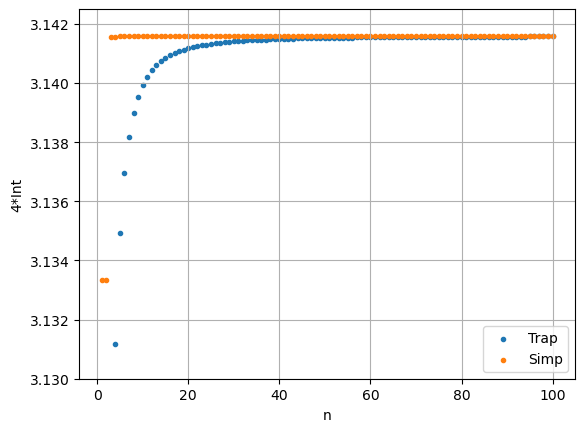

In [29]:
import matplotlib.pyplot as plt
n = np.arange(1,101)

pi_trap = []
pi_simp = []

for i in n:
    I_trap = trapecio_compuesto(f, a, b, i)
    I_simp = simpson_compuesto(f, a, b, i if i % 2 == 0 else i+1)
    pi_trap.append(I_trap*4)
    pi_simp.append(I_simp*4)

plt.scatter(n,pi_trap, marker = '.', label = 'Trap')
plt.scatter(n,pi_simp, marker = '.', label = 'Simp')
plt.xlabel('n')
plt.ylabel('4*Int')
plt.ylim(3.13,3.1425)
plt.legend()
plt.grid()
plt.show()

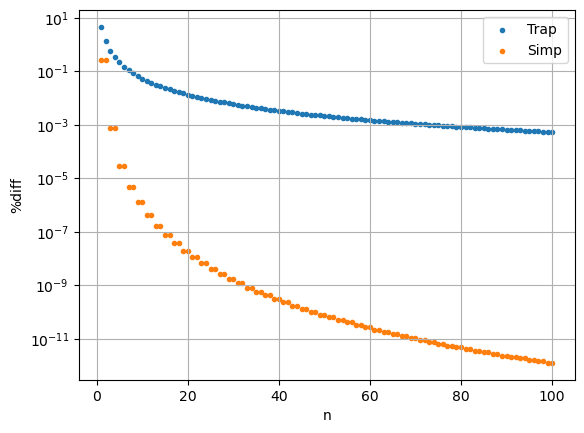

In [30]:
diff_trap = 100*np.abs(pi_trap-np.pi*np.ones_like(pi_trap))/np.pi*np.ones_like(pi_trap)
diff_simp = 100*np.abs(pi_simp-np.pi*np.ones_like(pi_simp))/np.pi*np.ones_like(pi_simp)

plt.scatter(n,diff_trap, marker = '.', label = 'Trap')
plt.scatter(n,diff_simp, marker = '.', label = 'Simp')
plt.xlabel('n')
plt.ylabel('%diff')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()